In [1]:
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
import ringdown.qnms
import makefun
from scipy.optimize import curve_fit
import statistics
import matplotlib.lines as mlines
import pandas as pd

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [57]:
# define what modes to use
def rd_fun(modes=[(2,2,0),(2,2,1)]):
    #create function signature
    func_signature="rngdwn_multi_modes(time,M,chi"
    # loop through defined modes
    for mode in modes:
        l,m,n = mode
        func_signature+= f",a{l}{m}{n},phi{l}{m}{n}"
    func_signature+=")"
    # kwargs = a220, phi220, a221, phi221, ...
    def new_fun(time,M,chi,**kwargs):
        # creating empty time array to hold rngdwn() return
        ex = np.zeros(time.shape)
        # loop through defined modes
        for mode in modes:
            l,m,n=mode
            amplitude=kwargs[f"a{l}{m}{n}"]
            phi=kwargs[f"phi{l}{m}{n}"]
            # add back to empty time array  
            ex += rngdwn(time,M,chi,l,m,n,amplitude,phi)
        # return ex to have combined signal for all defined modes
        return ex
    # this fx now looks like what scipy.curve_fit expects...
    return makefun.create_function(func_signature,new_fun)

# let "test = rd_fun" // test now takes inputs of (time,M,chi,a220,phi220,a221,phi221) --> curve_fit can play with
test = rd_fun(modes=[(2,2,0),(2,2,1),(2,2,2),
                     (3,3,0),(3,3,1)])



def rngdwn(time,M,chi,l,m,n,amplitude,phi):
    # using get_ftau to retrieve frequency and damping time for given values (ftau = [freq, tau])
    ftau = ringdown.qnms.get_ftau(M,chi,n,l,m)
    gamma = (ftau[1])**-1
    t0 = 0
        
    wf_kws = dict(
    A = amplitude,
    phi = phi,
    f = ftau[0],                                                            
    gamma = gamma,                                                          
    )
        
    def get_signal(time, A, phi, f, gamma):
        # generate sinusoid
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)
    
    return signal



def plot_ringdown(x0,xdata,ydata,p0,bounds,approx):  

    popt,pcov = curve_fit(x0,xdata,ydata,p0,bounds=bounds)
    ydata_array = ydata.data
    x0_exp = x0(xdata, *popt)._values
    r = ydata_array - x0_exp #residual
    ss_res = np.sum(r**2) # this is an array
    ss_tot = np.sum((ydata_array-np.mean(ydata_array))**2)
    r_squared = 1 - (ss_res / ss_tot)
    fig1, ax1 = plt.subplots(figsize=(10,4))
    ax2 = ax1.twiny()
    ax1.set_xlim(0,.03)
    ax2.set_xlim(0,.03)
    ax1.set_xlabel('Time (s)',fontsize=20)
    ax1.set_ylabel('Strain',fontsize=20)
    ax2.set_frame_on(False)             
    ax2.get_xaxis().tick_bottom()           
    ax2.axes.get_xaxis().set_visible(False)
    ax1.tick_params(axis='both',labelsize=15)
    ax2.tick_params(axis='both',labelsize=15)
    #plot fit
    ax1.plot(xdata, ydata, label=f'{approx} Plus',c='blue')
    ax1.plot(xdata, test(xdata, *popt),label='scipy.curve_fit',c='orange')
    ax1.legend(bbox_to_anchor=(1.008, 1.02),loc='upper right',fontsize=15)
    ax1.legend(bbox_to_anchor=(1.008, 1.02),loc='upper right',fontsize=15)
    
    return popt, r_squared


def two_two_zero(time,M,chi,a220,phi220):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a220,
    phi = phi220,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_two_one(time,M,chi,a221,phi221):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a221,
    phi = phi221,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def two_two_two(time,M,chi,a222,phi222):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,2,2,2)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a222,
    phi = phi222,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_three_zero(time,M,chi,a330,phi330):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,0,3,3)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a330,
    phi = phi330,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal


def three_three_one(time,M,chi,a331,phi331):
    #pylab.figure(figsize=pylab.figaspect(0.4))
    ftau = ringdown.qnms.get_ftau(M,chi,1,3,3)
    gamma = (ftau[1])**-1
    t0=0
    time = cond.numpy()
        
    wf_kws = dict(
    A = a331,
    phi = phi331,
    f = ftau[0],
    gamma = gamma,
    )
        
    def get_signal(time, A, phi, f, gamma):
        s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
        return ringdown.Data(s, index=time)

    signal = get_signal(time, **wf_kws)

    return signal

In [35]:
# making large bound arrays for function input
gb = np.array([1e-4, np.pi])
guess_bounds = np.tile(gb, 5)
m_chi = [62,0.68]
con = np.concatenate((m_chi, guess_bounds))
#lower bounds
lower = np.array([1e-6, 0])
lower_bound = np.tile(lower, 5)
m_chi_lower = [50,0.3]
con_lower = np.concatenate((m_chi_lower,lower_bound))
#upper bounds
upper = np.array([1e-3, 2*np.pi])
upper_bound = np.tile(upper, 5)
m_chi_upper = [95, 0.85]
con_upper = np.concatenate((m_chi_upper, upper_bound))

In [59]:
def XPHMringdown_plots(mass1,mass2,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,x0,p0,bounds,approx):
    inclination = [0, np.pi/6, np.pi/3, np.pi/2]
    df_list=[]
    for i in inclination:        
        hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                                 mass1=mass1,
                                 mass2=mass2,
                                 delta_t=1.0/16384,
                                 f_lower=30,
                                 distance=1e-14,
                                 inclination=i,
                                 spin1x=spin1x,
                                 spin1y=spin1y,
                                 spin1z=spin1z,
                                 spin2x=spin2x,
                                 spin2y=spin2y,
                                 spin2z=spin2z)
        
        cropped = np.arange(0, .011, 0.001)
        for crop_start in cropped:
            # sample times ---> timeseries
            hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
            cond = hp_smp_ts.crop(crop_start,0)  

            # h+/hx data ---> timeseries
            hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
            cond_hp = hp_data.crop(crop_start,0)
            hp_signal = cond_hp.numpy()                  

            # repeat
            hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
            cond_hc = hc_data.crop(crop_start,0)
            hc_signal = cond_hc.numpy()                                         

            # use for hp+hc ringdown analysis
            time = cond.numpy()            

            x0 = x0
            xdata = time
            ydata = cond_hp
            p0 = p0
            bounds = bounds
            a, r_squared = plot_ringdown(x0,xdata,ydata,p0,bounds,approx)

            # create dict for labels and values for dataframe
            my_dict = dict()
            for ind, v in enumerate(a):
                my_dict[ind] = [v]
            # append r_squared values to dataframe
            my_dict[len(a)] = [r_squared]
            # change dict to dataframe
            temp_df = pd.DataFrame.from_dict(my_dict)
            # label dataframe columns
            temp_df.columns = ["mass", "chi",
                               "a220","phi220",
                               "a221","phi221",
                               "a222","phi222",
                               "a330","phi330",
                               "a331","phi331", 
                               "r_squared"]
            # append iteration of dataframes at diff inclinations
            df_list += [temp_df]

            # labels so I remember what plot is what even though I remove the labels later
            I = mlines.Line2D([],[],color='white', label=f'Inclination:{i}')
            M1 = mlines.Line2D([],[],color='white', label=f'M1:{mass1}')
            M2 = mlines.Line2D([],[],color='white', label=f'M2:{mass2}')
            SPIN1 = mlines.Line2D([],[],color='white', label=f'Spin1(x,y,z):{spin1x},{spin1y},{spin1z}')
            SPIN2 = mlines.Line2D([],[],color='white', label=f'Spin2(x,y,z):{spin2x},{spin2y},{spin2z}')
            T0 = mlines.Line2D([],[],color='white', label=f'T0:{crop_start}')
            plt.legend(handles=[I,M1,M2,SPIN1,SPIN2,T0],loc='lower right',frameon=False,fontsize=10)
        
    df = pd.concat(df_list,ignore_index=True)
        
    return df

/var/folders/df/gxkbn60j1xgfdk95nv77bvvw0000gn/T/ipykernel_26586/2139821289.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(10,4))


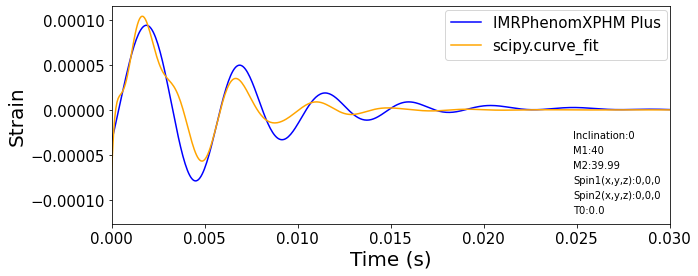

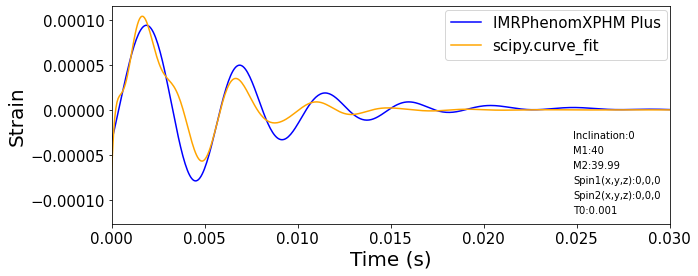

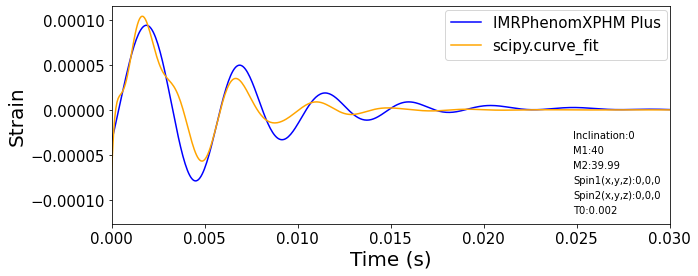

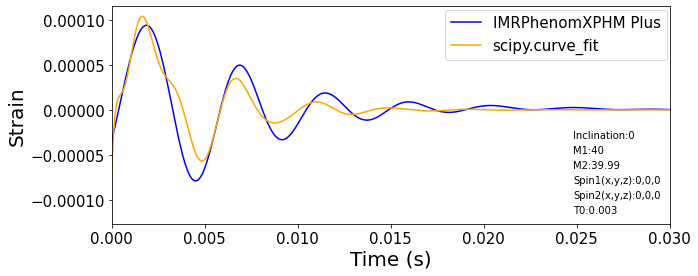

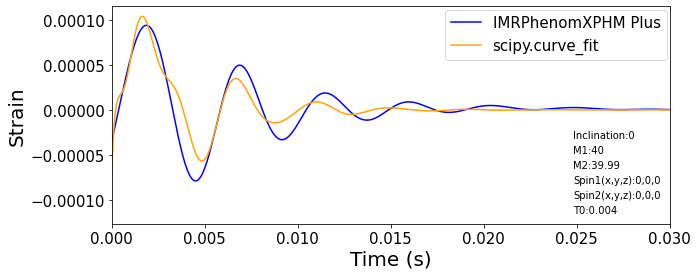

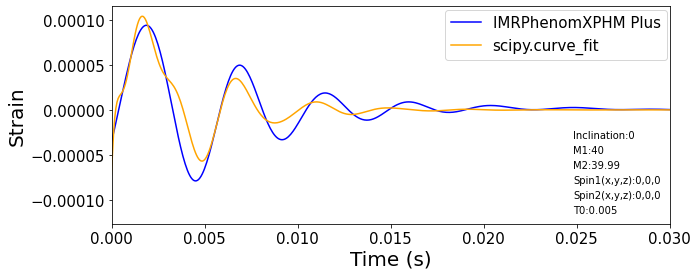

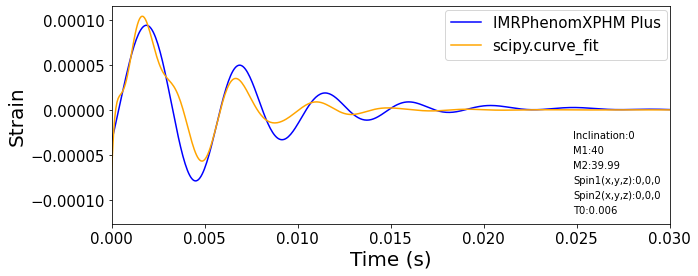

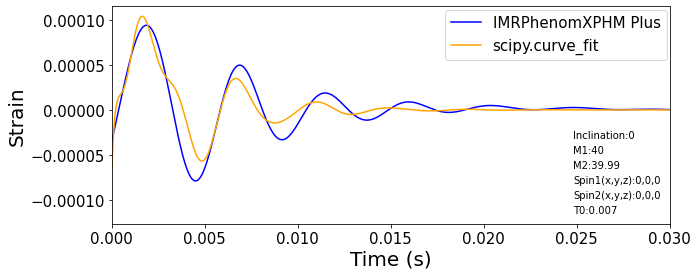

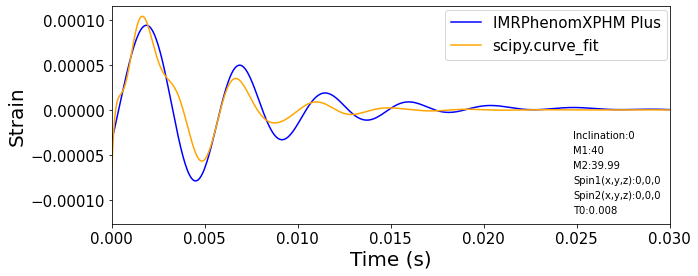

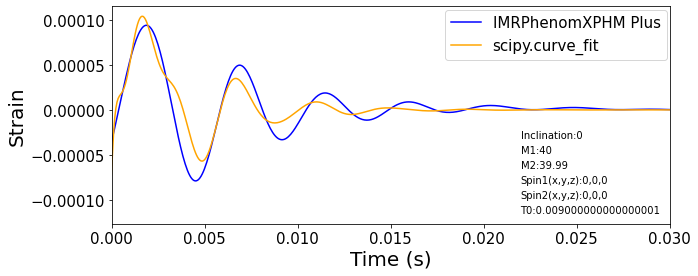

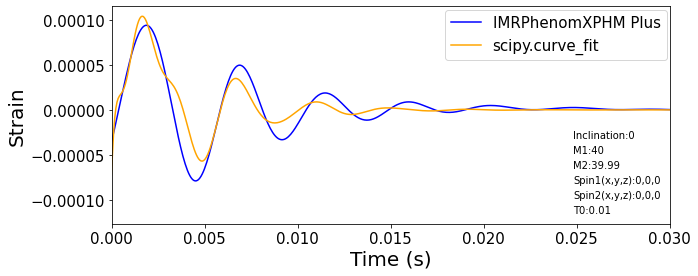

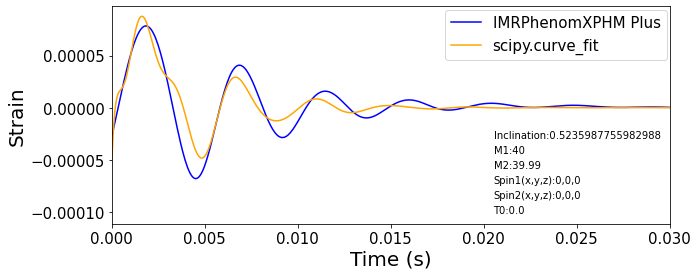

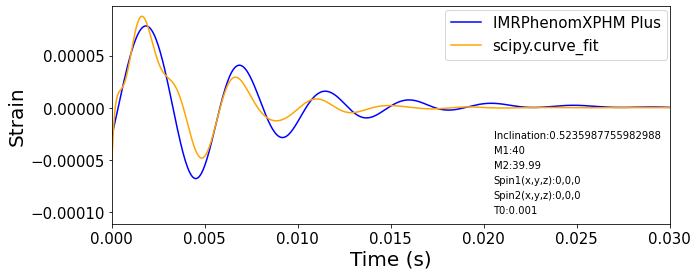

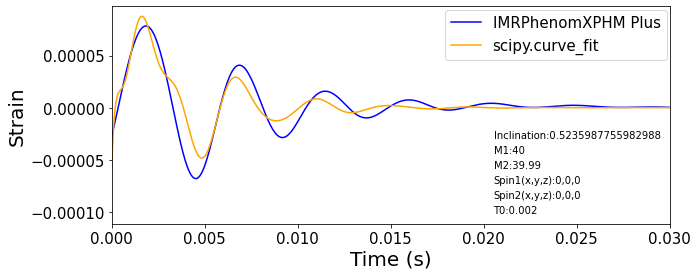

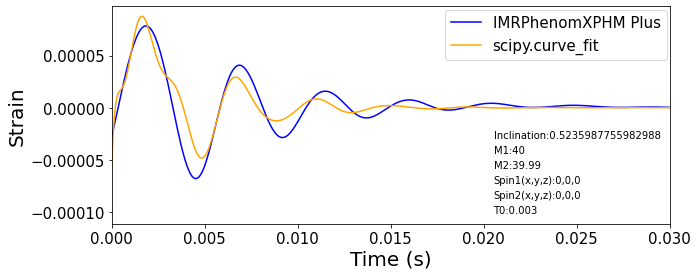

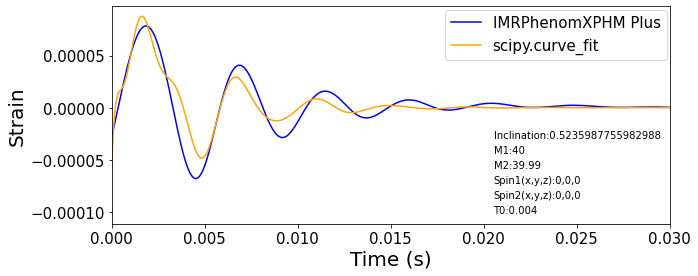

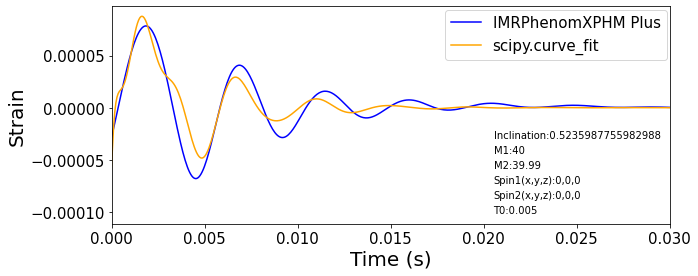

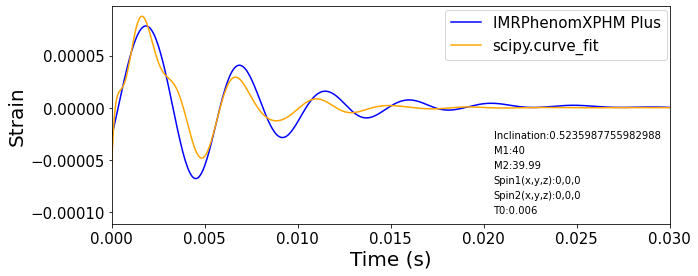

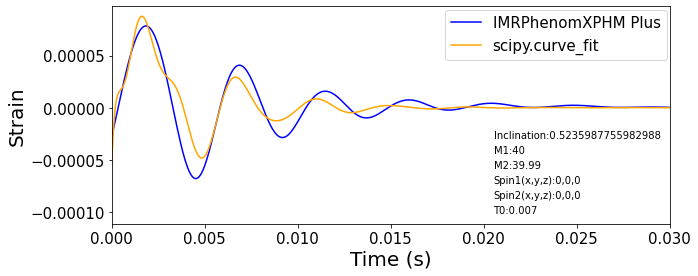

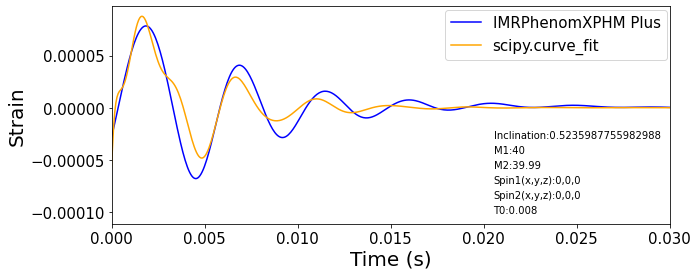

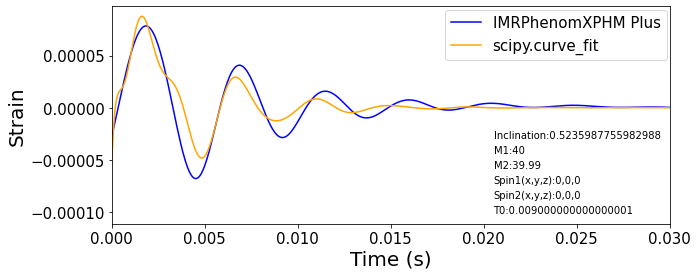

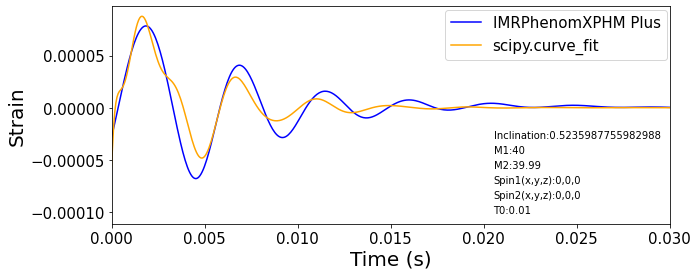

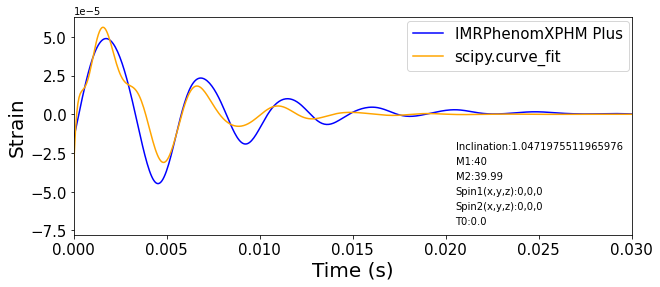

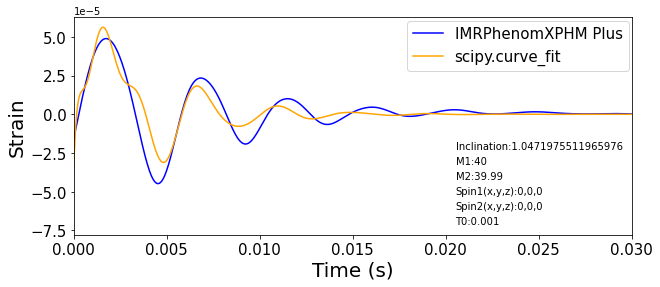

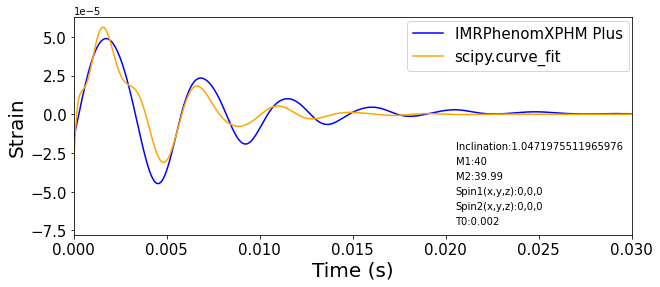

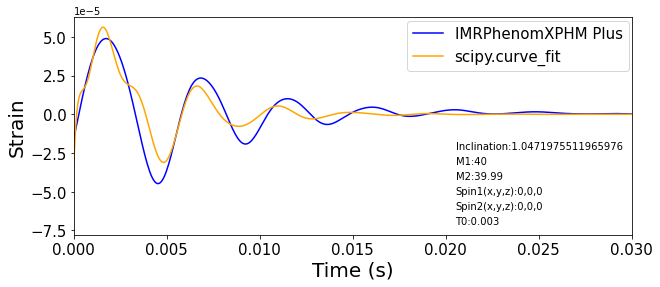

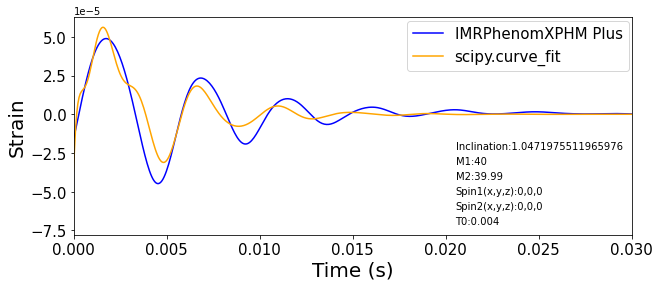

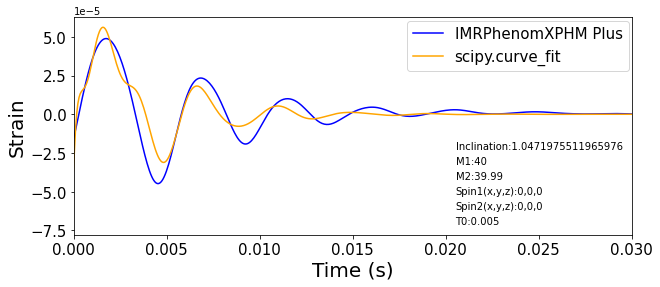

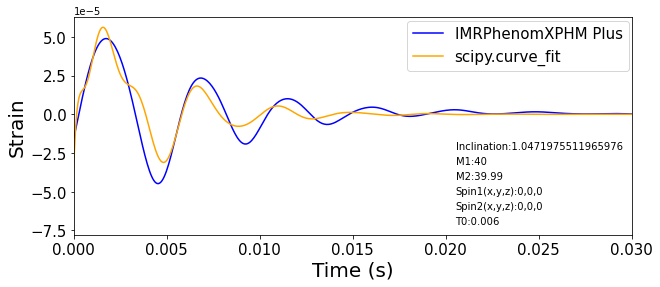

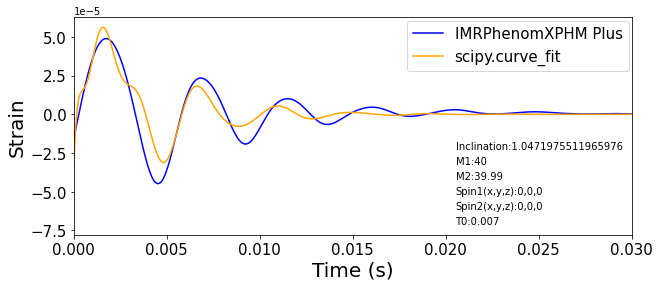

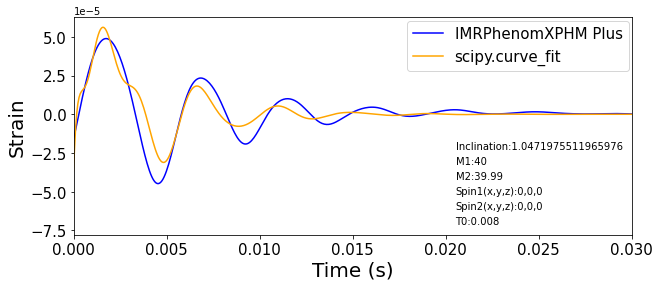

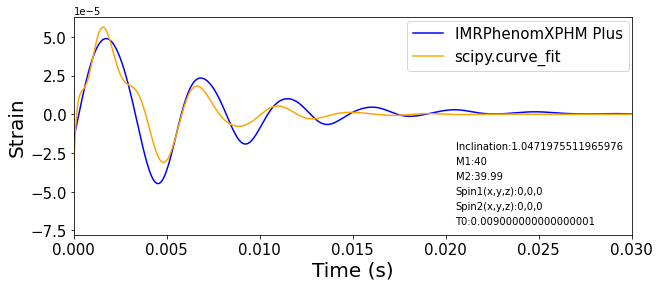

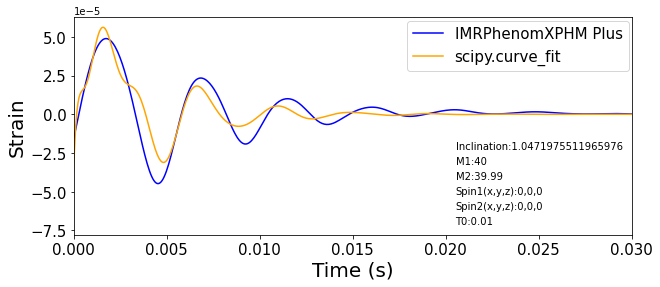

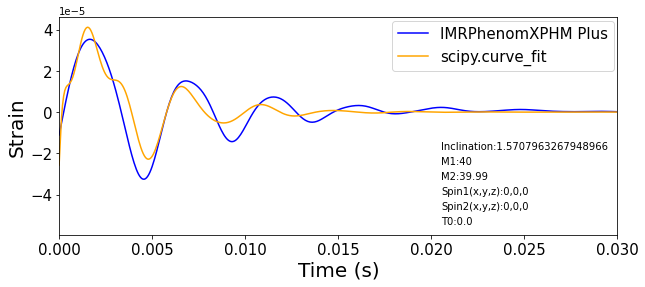

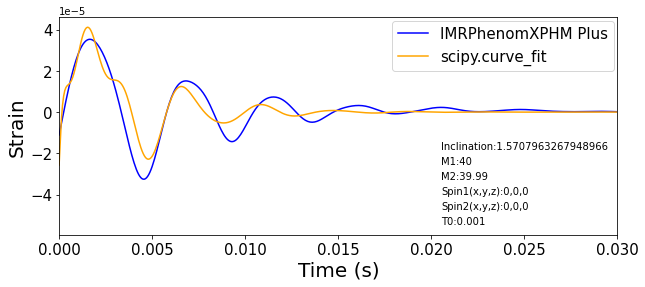

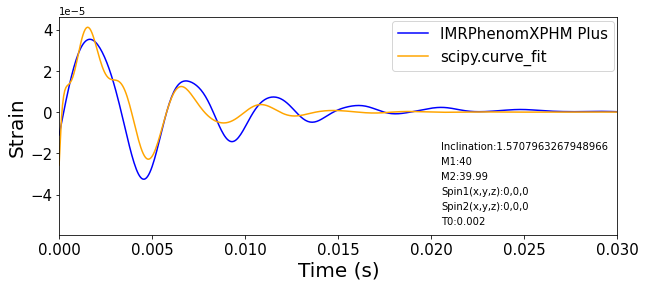

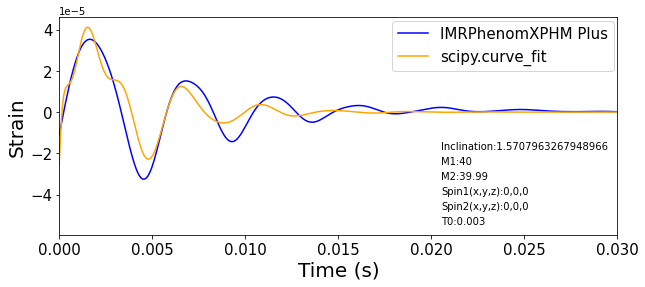

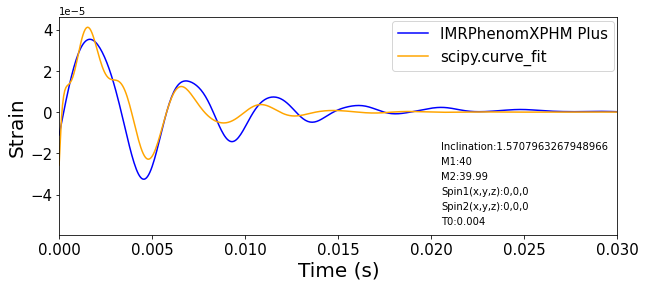

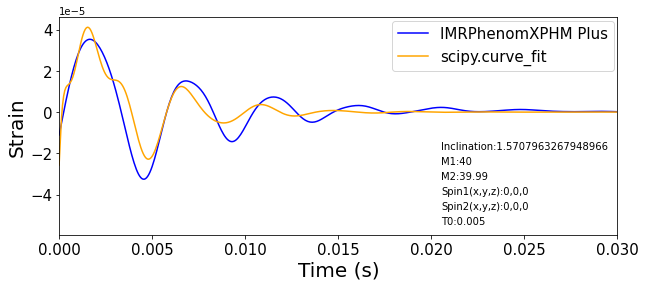

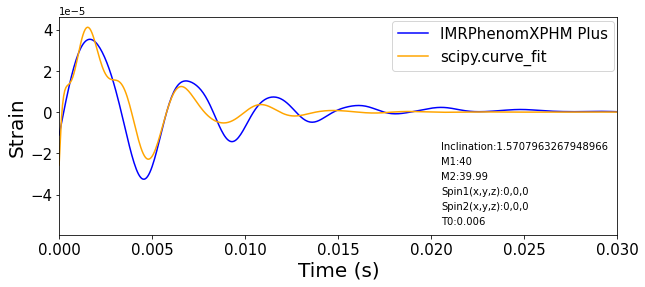

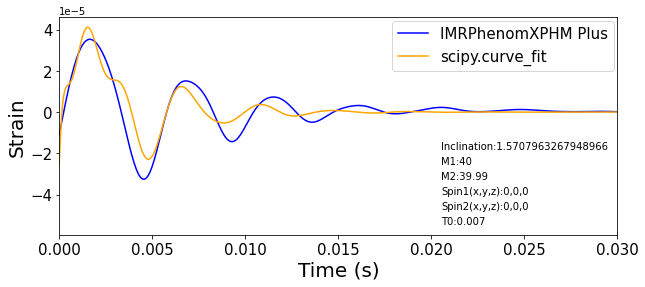

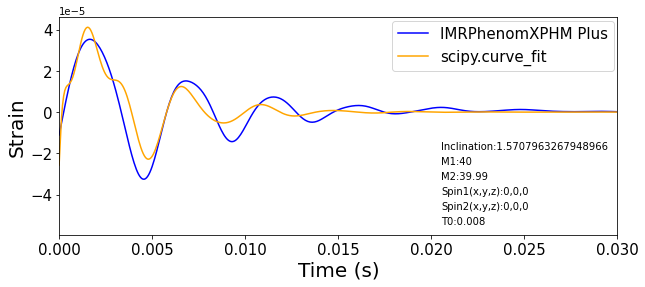

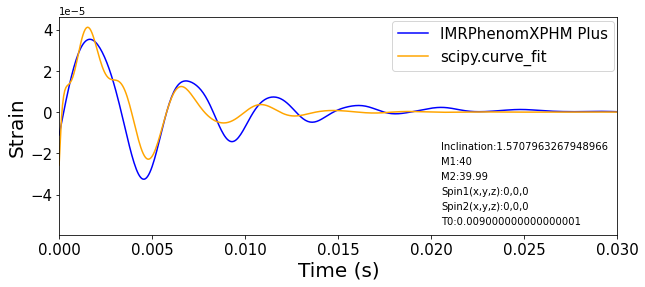

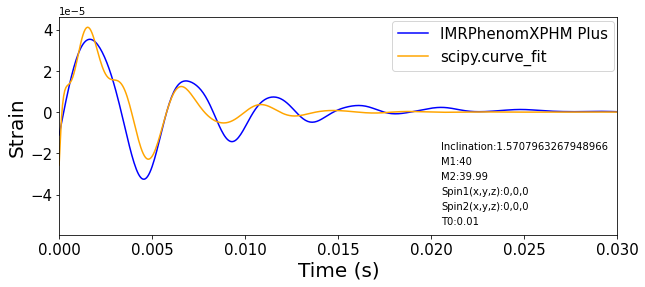

In [60]:
#.001 t0
equalmass_zerospinz = XPHMringdown_plots(40,39.99,0,0,0,0,0,0,test,con,(con_lower,con_upper),'IMRPhenomXPHM')

In [61]:
equalmass_zerospinz

,mass,chi,a220,phi220,a221,phi221,a222,phi222,a330,phi330,a331,phi331,r_squared
0,55.830101,0.303104,0.000287,2.019516,0.000956,5.260778,0.000673,3.732517,0.000046,3.183566,0.000463,1.225990,0.150357
1,55.830089,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732516,0.000046,3.183564,0.000463,1.225990,0.150357
2,55.830086,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732515,0.000046,3.183564,0.000463,1.225990,0.150357
3,55.830086,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732515,0.000046,3.183564,0.000463,1.225990,0.150357
4,55.830087,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732516,0.000046,3.183564,0.000463,1.225990,0.150357
5,55.830090,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732516,0.000046,3.183564,0.000463,1.225990,0.150357
6,55.830094,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732516,0.000046,3.183565,0.000463,1.225990,0.150357
7,55.830088,0.303103,0.000287,2.019516,0.000956,5.260778,0.000673,3.732516,0.000046,3.183564,0.000463,1.225990,0.150357
8,55.830081,0.303103,0.000287,2.019516,0.000956,5.260777,0.000673,3.732515,0.000046,3.183564,0.000463,1.225990,0.150357
9,55.830084,0.303103,0.000287,2.019516,0.000956,5.260777,0.000673,3.732515,0.000046,3.183564,0.000463,1.225990,0.150358


# not updated to reflect what's above

0.14248031022541163
0.09510115859271584
0.08457656737766284
0.13753303226888358


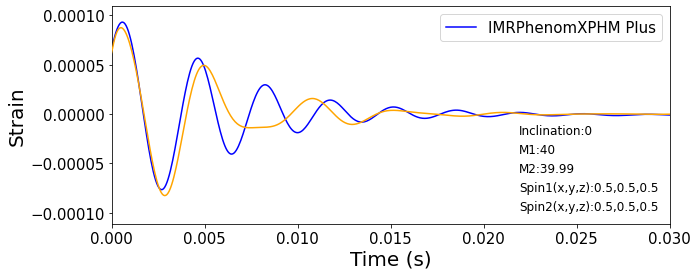

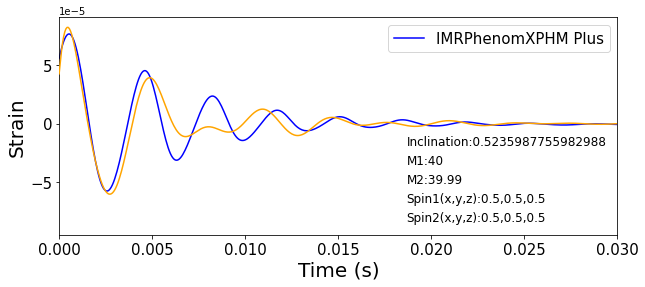

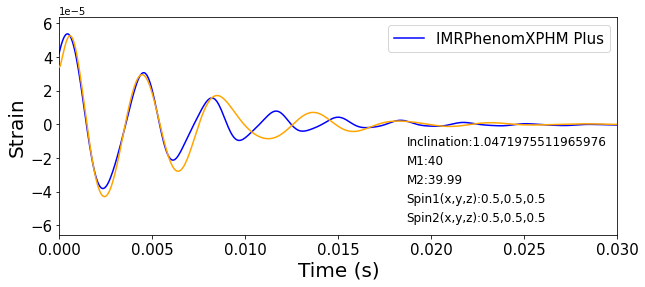

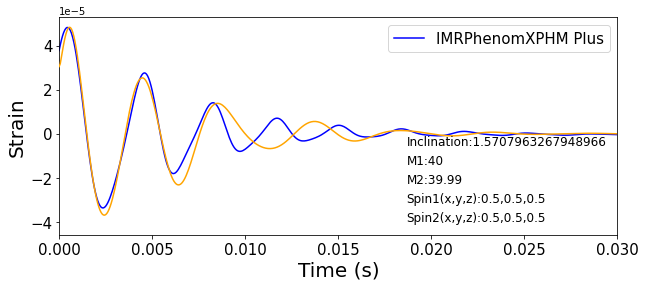

In [5]:
equalmass_halfspinxyz = XPHMringdown_plots(40,39.99,0.5,0.5,0.5,0.5,0.5,0.5,test,con,(con_lower,con_upper))

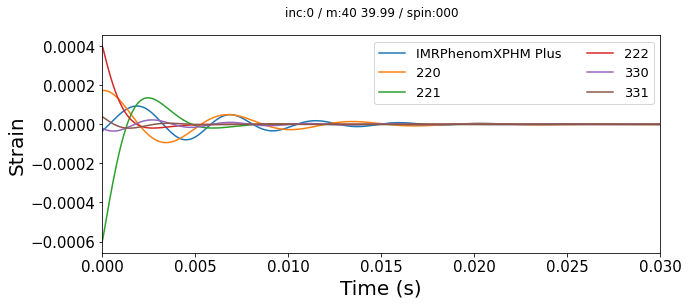

In [199]:
#indiv modes/overtones over IMR
inclination = [0]
for i in inclination:
    hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                                mass1=40,
                                mass2=39.99,
                                delta_t=1.0/16384,
                                f_lower=30,
                                distance=1e-14,
                                inclination=i,
                                spin1x=0.,
                                spin1y=0.,
                                spin1z=0.,
                                spin2x=0.,
                                spin2y=0.,
                                spin2z=0.)

    # sample times ---> timeseries
    hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
    cond = hp_smp_ts.crop(0.645,0)                                      

    # h+/hx data ---> timeseries
    hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)  
    cond_hp = hp_data.crop(0.645,0)
    hp_signal = cond_hp.numpy()                  

    # repeat
    hc_data = TimeSeries(hc, delta_t=1/16384, epoch=0)              
    cond_hc = hc_data.crop(0.645,0)
    hc_signal = cond_hc.numpy()                                         

    # use for hp+hc ringdown analysis
    time = cond.numpy()             

    x = two_two_zero(time,95,.4,1.8e-4,6)
    y = two_two_one(time,95,.4,6.5e-4,3.5)
    z = two_two_two(time,95,.4,4.1e-4,6.3)
    a = three_three_zero(time,95,.4,3.9e-5,2.1)
    b = three_three_one(time,95,.4,4.9e-5,6.1e-1)

    plt.figure(figsize=(10,4))
    plt.plot(cond, cond_hp, label='IMRPhenomXPHM Plus')
    plt.plot(x,label='220')
    plt.plot(y,label='221')
    plt.plot(z,label='222')
    plt.plot(a,label='330')
    plt.plot(b,label='331')
    plt.xlim(0, 0.03)
    #plt.ylim(-.0002,.00015)
    plt.suptitle('inc:0 / m:40 39.99 / spin:000')
    plt.legend(fontsize=13,loc='upper right',ncol=2)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Strain',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.savefig('equalmass_halfspinxyz_incpi2',bbox_inches='tight')